<a href="https://colab.research.google.com/github/ShashankKamath/challenges/blob/master/Tagup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving unit0000_alarms.csv to unit0000_alarms (3).csv
Saving unit0000_rms.csv to unit0000_rms (5).csv


In [4]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
%matplotlib inline 

def load_rms(filename):
    return pd.read_csv(filename)
def load_alarms(filename):
    return pd.read_csv(filename, header=None, names=["timestamp", "message"], index_col="timestamp")
rms = load_rms('unit0000_rms.csv')
alarms = load_alarms('unit0000_alarms.csv')
rms.head()
# alarms.head()

,timestamp,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
0,2003-12-13 19:56:43.777979848,0.150438,-0.059544,0.045503,5.084823,0.019528
1,2003-12-13 20:07:32.457298714,0.511660,0.627101,0.208669,7.334172,2.081454
2,2003-12-13 20:13:43.182783330,0.824233,1.732618,0.286401,8.843053,3.485346
3,2003-12-13 20:27:19.295198297,1.506626,3.115258,0.483992,11.749493,6.041188
4,2003-12-13 20:35:08.719032171,2.034869,3.923323,0.851620,12.947061,7.309662


In [7]:
rms.describe()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04,9.171500e+04
mean,-8.111152e+46,-4.431337e+60,-1.387827e+56,-6.640742e+69,-1.937422e+48
std,2.456380e+49,1.903274e+63,4.202968e+58,2.011115e+72,5.867349e+50
min,-7.439020e+51,-5.565298e+65,-1.272847e+61,-6.090557e+74,-1.776896e+53
25%,1.017725e+03,2.311319e+02,3.239347e+01,1.179731e+02,6.489677e+01
50%,1.066347e+03,2.667104e+02,3.944687e+01,1.564521e+02,7.799157e+01
75%,1.106721e+03,2.993994e+02,4.607173e+01,1.978223e+02,9.086132e+01
max,7.978110e+44,1.500194e+65,1.555360e+55,3.117856e+55,1.710299e+40


There is clearly a lot of noise in the data. The noisy points are so large in magnitude that they are skewing the means and other summary statistics.

Plotting the histograms for Unit 0 to detect noise in the data


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f97b9588>,
      dtype=object)

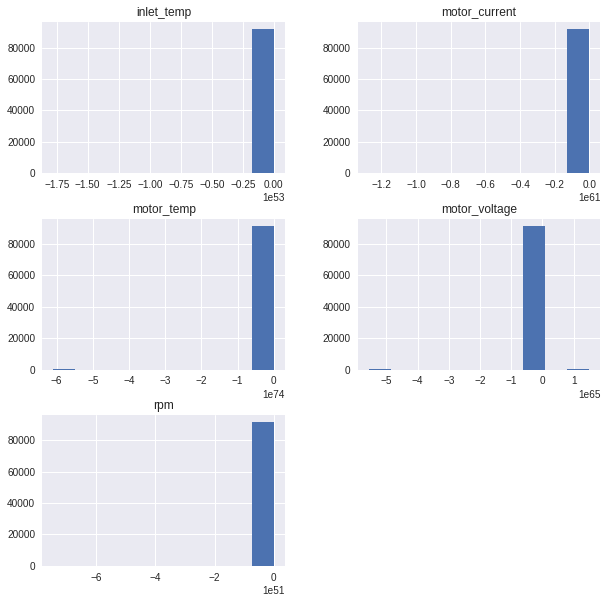

In [0]:
rms.hist(figsize=(10,10))

From these histogram it is safe to conclude that the data is extremely noisy.

Uploading the python library file to remove outliers. 

In [5]:
uploaded = files.upload()

Saving AdvancedAnalytics_2.py to AdvancedAnalytics_2 (1).py


After observing the values of Unit_0, there are many outliers and to remove them, I used the library AdvancedAnalytics_2.py.

In [6]:
from AdvancedAnalytics_2 import ReplaceImputeEncode
attribute_map={'rpm': ['I', (-50, 2700)], 'motor_voltage': ['I',(-100,410)], 'motor_current': ['I',(-20,60)],'motor_temp': ['I',(0,400)],'inlet_temp': ['I',(0,275)] }
rie=ReplaceImputeEncode(data_map=attribute_map,display=True) 
rms_trans=rie.fit_transform(rms)
rms_trans.describe()



********** Data Preprocessing ***********
Features Dictionary Contains:
5 Interval, 
0 Binary, 
0 Nominal, and 
1 Excluded Attribute(s).

Data contains 91715 observations & 6 columns.


Attribute Counts
.................... Missing  Outliers
rpm............         0       818
motor_voltage..         0       860
motor_current..         0       944
motor_temp.....         0      1052
inlet_temp.....         0      1029


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,91715.000000,91715.000000,91715.000000,91715.000000,91715.000000
mean,943.461636,245.537267,36.912082,155.472060,78.273447
std,353.264261,79.129552,11.677170,48.658092,21.753976
min,-49.072074,-98.700975,-19.913028,0.000174,0.004837
25%,1016.719457,231.695454,32.476371,118.643661,65.251163
50%,1065.640393,265.970154,39.260401,155.556046,78.273447
75%,1106.067064,298.973676,45.963696,197.165913,90.633026
max,2644.083997,402.604421,57.041568,389.431013,271.463539


Losing Timestamp so merging the old dataset with new to get back timestamp.


In [0]:
result = pd.merge(rms, rms_trans, how='inner', on=['rpm', 'motor_voltage','motor_current','motor_temp','inlet_temp'])
result = result.set_index('timestamp')

Plotting the cleaned data to analyse further. 

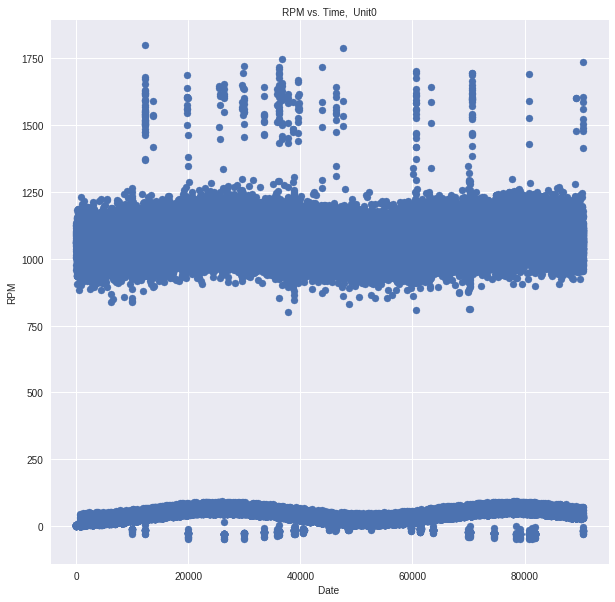

In [0]:
plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('RPM',fontsize = 10)
plt.title('RPM vs. Time,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['rpm'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

In the scatter plot of rpm, there is a clear distinction which can be made between the values. There are 2 clusters of data, one likely in the range of 0 to 100 and the other in the region from 800 and above.

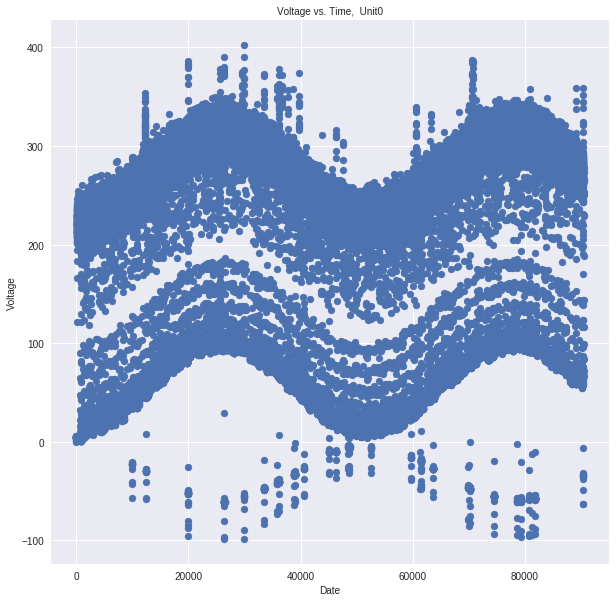

In [0]:
plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Voltage',fontsize = 10)
plt.title('Voltage vs. Time,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['motor_voltage'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

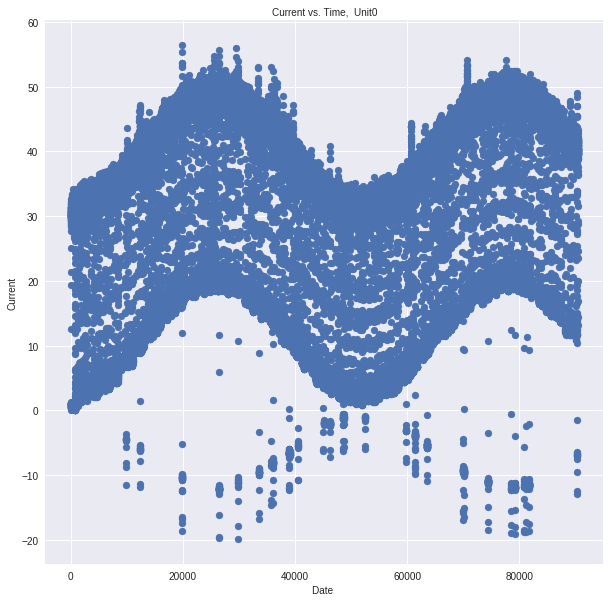

In [0]:
plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Current',fontsize = 10)
plt.title('Current vs. Time,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['motor_current'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

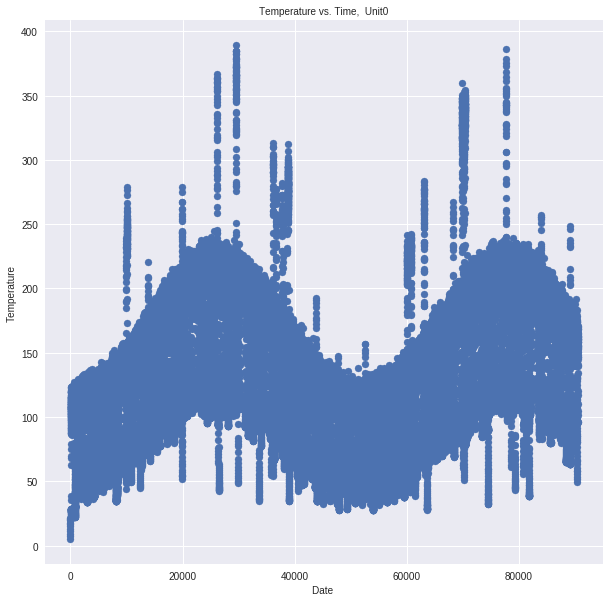

In [0]:
plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Motor Temperature',fontsize = 10)
plt.title('Motor Temperature vs. Time,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['motor_temp'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

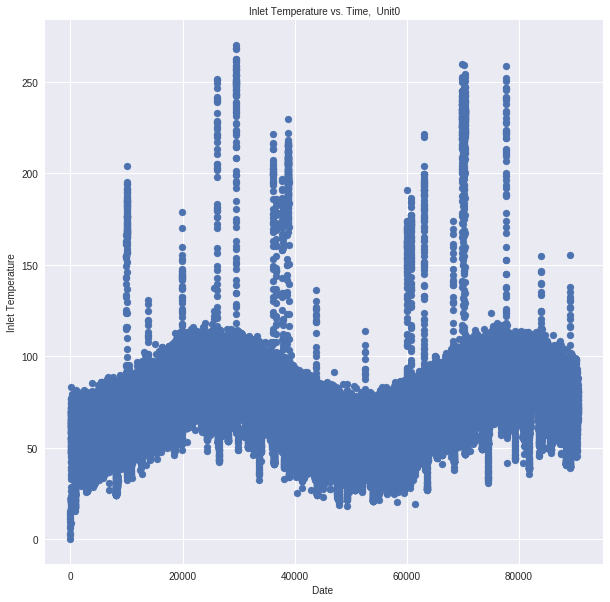

In [0]:
plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Inlet Temperature',fontsize = 10)
plt.title('Inlet Temperature vs. Time,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['inlet_temp'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

From these plots,  we can varying trends in each plot. Except for RPM graph, rest follow a pattern of sine wave.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97f95cb080>,
      dtype=object)

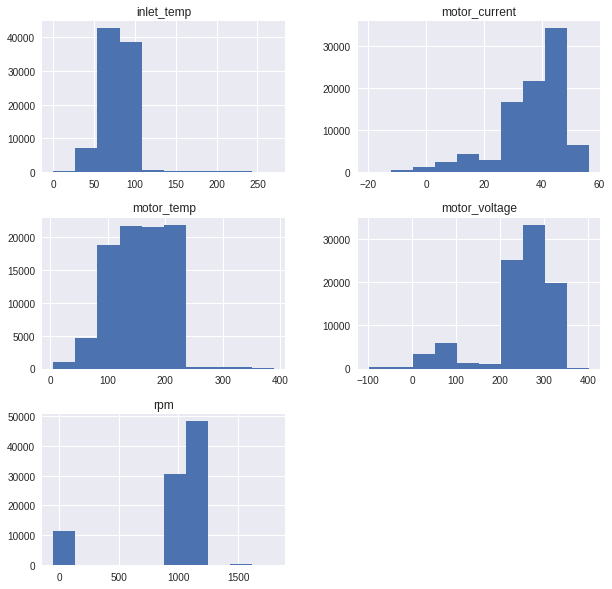

In [0]:
result.hist(figsize=(10,10))

From these histograms, it seems better than before cleaning. The data is spread out a bit and not skewed.

Normallizing the data such that all values lie between 0 and 1

In [9]:
rms_norm=((result-result.min())/(result.max()-result.min()))
rms_norm.describe()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
count,90471.000000,90471.000000,90471.000000,90471.000000,90471.000000
mean,0.538726,0.688620,0.745560,0.391906,0.290032
std,0.189304,0.155857,0.151525,0.126361,0.079933
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.577787,0.659204,0.685958,0.295084,0.241112
50%,0.603365,0.729679,0.778075,0.394962,0.288915
75%,0.624883,0.793919,0.863532,0.501045,0.335885
max,1.000000,1.000000,1.000000,1.000000,1.000000


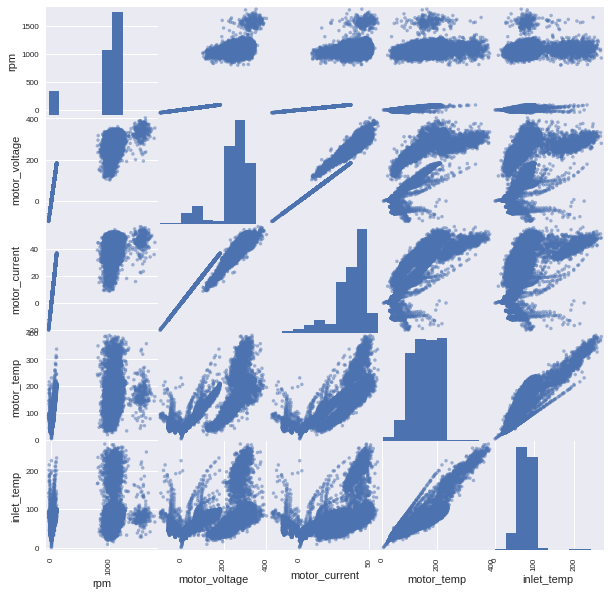

In [0]:
pd.plotting.scatter_matrix(result, figsize=(10, 10))
plt.show()

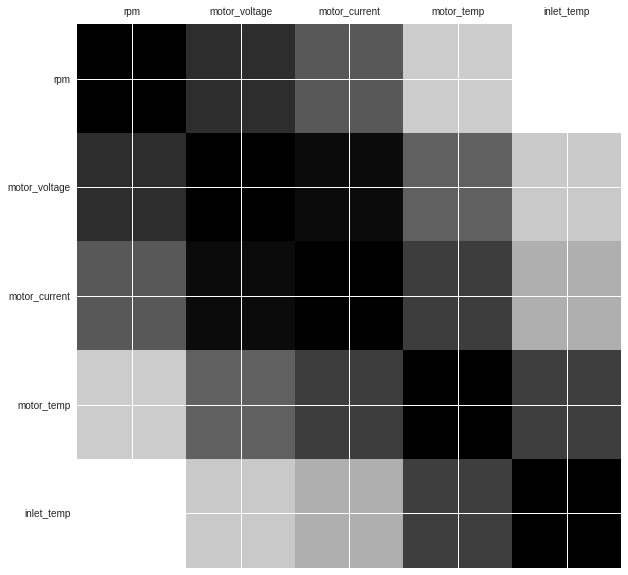

In [0]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(rms_norm) 

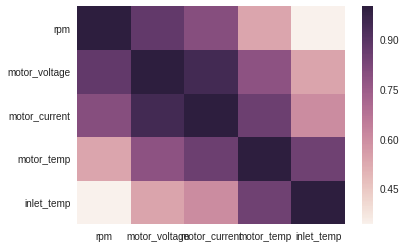

In [0]:
import seaborn as sns
corr = rms_trans.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
correlation = rms_norm.corr()
correlation

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
rpm,1.000000,0.902534,0.819581,0.547762,0.347853
motor_voltage,0.902534,1.000000,0.973347,0.800382,0.555692
motor_current,0.819581,0.973347,1.000000,0.873444,0.620869
motor_temp,0.547762,0.800382,0.873444,1.000000,0.870702
inlet_temp,0.347853,0.555692,0.620869,0.870702,1.000000


From these correlation plots, we can observe that rpm has high positive correlation between Voltage and Current which makes sense as per physics. We can observe that in relation to Ohm's Law there is a strong correlation between voltage and current as V is directly proportional to Current with constant resistance. Even voltage and motor temperature have a positive correlation which can explained easily. As the voltage increases, rpm increases resulting in more friction and leading to increase in temperature. But there is not much correlation between rpm and motor temperature which deviates from my expectation.

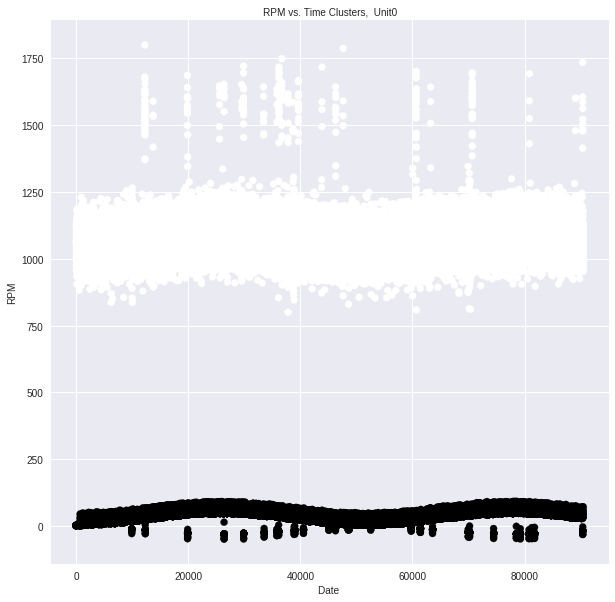

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(result.loc[:],result['rpm'])

plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('RPM',fontsize = 10)
plt.title('RPM vs. Time Clusters,  Unit0',fontsize = 10)
plt.scatter(range(len(result['rpm'])),result['rpm'],c=kmeans.labels_)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

In the above scatter plot of rpm, a clear distinction can be made between the clusters.

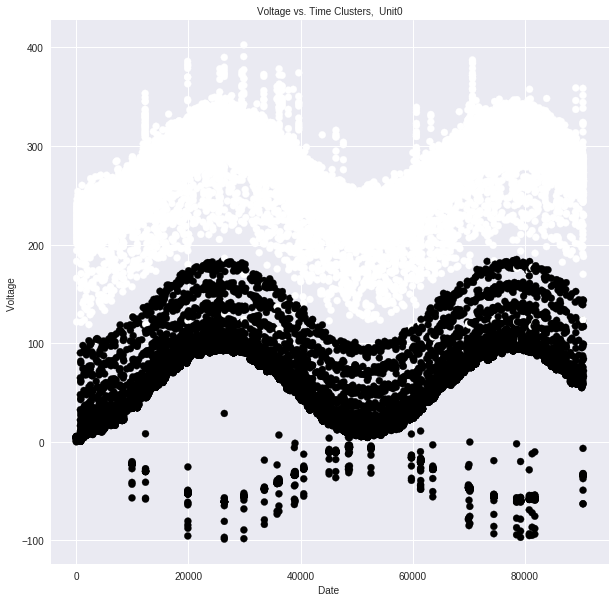

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(result.loc[:],result['motor_voltage'])

plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Voltage ',fontsize = 10)
plt.title('Voltage vs. Time Clusters,  Unit0',fontsize = 10)
plt.scatter(range(len(result['motor_voltage'])),result['motor_voltage'],c=kmeans.labels_)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

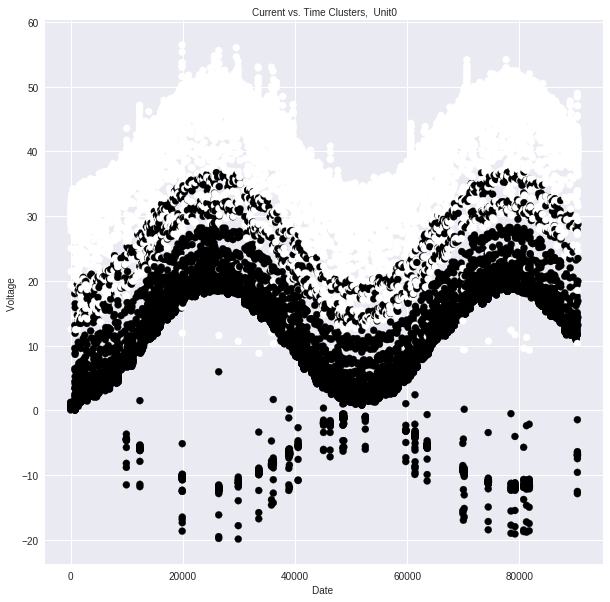

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(result.loc[:],result['motor_current'])

plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Voltage ',fontsize = 10)
plt.title('Current vs. Time Clusters,  Unit0',fontsize = 10)
plt.scatter(range(len(result['motor_current'])),result['motor_current'],c=kmeans.labels_)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

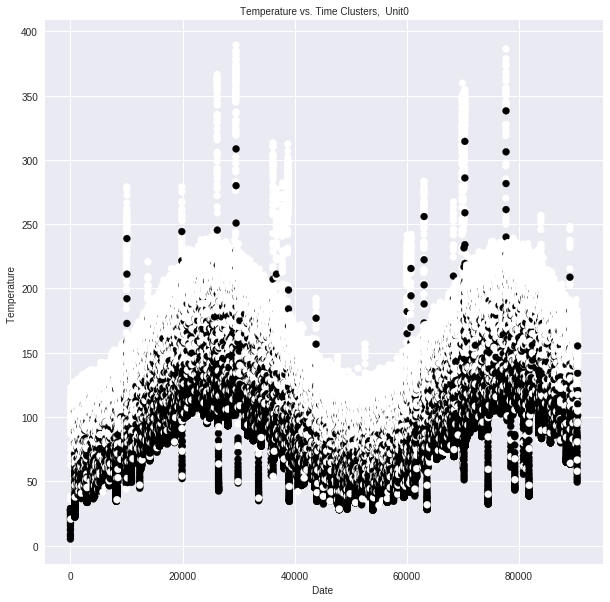

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(result.loc[:],result['motor_temp'])

plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Temperature ',fontsize = 10)
plt.title('Temperature vs. Time Clusters,  Unit0',fontsize = 10)
plt.scatter(range(len(result['motor_temp'])),result['motor_temp'],c=kmeans.labels_)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

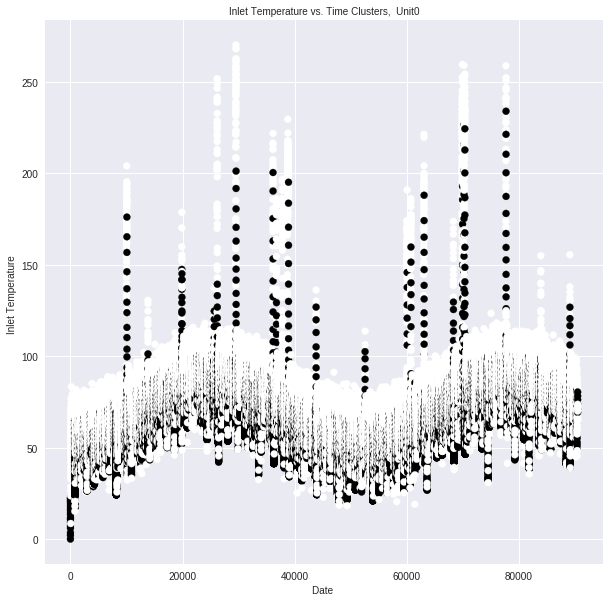

In [0]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(result.loc[:],result['inlet_temp'])

plt.figure(figsize=(10,10))
plt.xlabel('Date ',fontsize = 10)
plt.ylabel('Inlet Temperature ',fontsize = 10)
plt.title('Inlet Temperature vs. Time Clusters,  Unit0',fontsize = 10)
plt.scatter(range(len(result['inlet_temp'])),result['inlet_temp'],c=kmeans.labels_)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

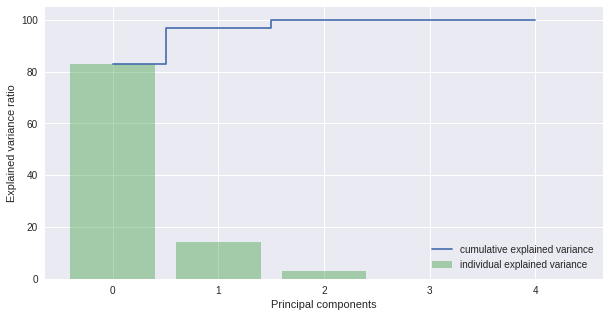

In [0]:
X_std = rms_norm.values
# X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [0]:
var_exp

[82.9620403060577,
 14.091740959921387,
 2.8668618327542106,
 0.07425331965436559,
 0.005103581612335419]

From the above graph, we cab see that RPM has the highest variance and can be chosen as the 1st Principal Component while the Voltage can be selected as the second principal component.

Since the timestamp are not uniform, it is not possible to use the data directly, so I am sampling it per hour basis. Per Day basis interval sampling leads to averaging out the data a lot and we miss out the spikes responsible for the failure of the motor. Resampling with respect to days does not make sense as the motor can go bad the next hour after the sampling is done and the detection cannot be made as we have averaged the values with respect to that day loosing out on information.

In [0]:
rms_norm.index = pd.to_datetime(rms_norm.index, unit='ns')
rms_norm=rms_norm.resample('H').mean()
rms_norm.index=pd.to_datetime(rms_norm.index)

In [0]:
rms_norm.head()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
timestamp,,,,,
2003-12-13 19:00:00,0.026615,0.196769,0.261342,0.000000,0.000000
2003-12-13 20:00:00,0.027387,0.203246,0.269090,0.018323,0.024021
2003-12-13 21:00:00,0.027960,0.207509,0.274349,0.040778,0.054089
2003-12-13 22:00:00,0.027916,0.207012,0.274460,0.052485,0.070979
2003-12-13 23:00:00,0.027807,0.206404,0.273302,0.058439,0.079682


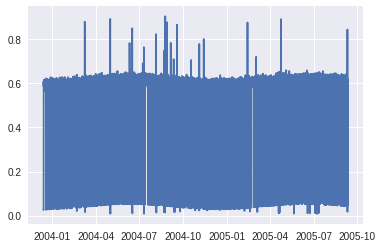

In [0]:
plt.plot(rms_norm['rpm'])

TO obtain a magnified view.

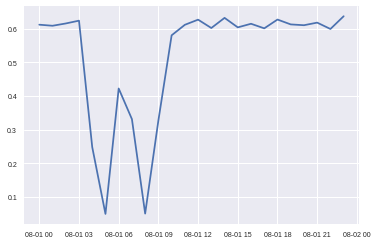

In [0]:
plt.plot(rms_norm.loc["2005-08-08":"2005-08-08"]['rpm'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 7)

In the above rpm graph of Unit 0, we can see that there are two sudden dips towards 0 while at other times the rpm shows steady value.

Using RNN with LSTM for predicting the outcome for Unit0

In [0]:
X = []
y = []
lookback = 10  # look 10 hours behind, predict the next hour
for i in range(lookback, len(rms_norm)):
    X.append(rms_norm.iloc[i-lookback:i].values)
    y.append(rms_norm['rpm'].iloc[i])
    
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], len(rms_norm.columns)))

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=False)

In [0]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

model = Sequential()
model.add(LSTM(units=20, return_sequences=False, input_shape=(lookback, len(rms_norm.columns))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(Xtrain, ytrain, epochs=50, batch_size=200)

Epoch 1/50
11457/11457 [==============================] - 1s 127us/step - loss: 0.0664
Epoch 2/50
11457/11457 [==============================] - 1s 48us/step - loss: 0.0352
Epoch 3/50
11457/11457 [==============================] - 1s 47us/step - loss: 0.0319
Epoch 4/50
11457/11457 [==============================] - 1s 48us/step - loss: 0.0288
Epoch 5/50
11457/11457 [==============================] - 1s 49us/step - loss: 0.0264
Epoch 6/50
11457/11457 [==============================] - 1s 47us/step - loss: 0.0256
Epoch 7/50
11457/11457 [==============================] - 1s 47us/step - loss: 0.0249
Epoch 8/50
11457/11457 [==============================] - 1s 49us/step - loss: 0.0239
Epoch 9/50
11457/11457 [==============================] - 1s 49us/step - loss: 0.0232
Epoch 10/50
11457/11457 [==============================] - 1s 49us/step - loss: 0.0226
Epoch 11/50
11457/11457 [==============================] - 1s 48us/step - loss: 0.0220
Epoch 12/50
11457/11457 [==========================

In [0]:
predictions = model.predict(Xtest)

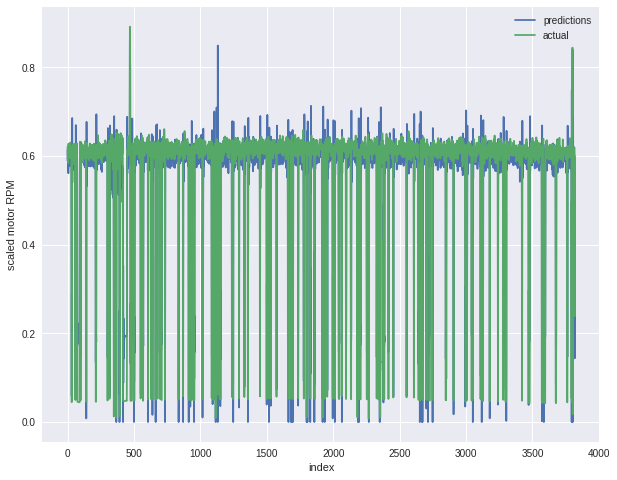

In [0]:
plt.figure(figsize=(10,8))
plt.plot(predictions)
plt.plot(ytest)
plt.ylabel('Motor RPM')
plt.xlabel('Index')
plt.legend(['predictions', 'actual'])
plt.show()

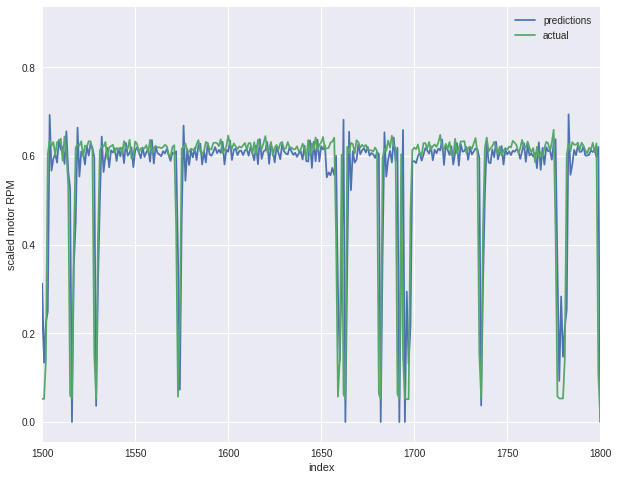

In [0]:
plt.figure(figsize=(10,8))
plt.plot(predictions)
plt.plot(ytest)
plt.ylabel('Motor RPM')
plt.xlabel('Index')
plt.legend(['predictions', 'actual'])
plt.xlim((1500, 1800))
plt.show()

From the above two graphs, we can see that using RNN with LSTM, we can predict the RPM values almost identical to the original graph. In the above graph the unit0 dataset is split into train and test and test data is predicted.

Working on Whole dataset. The main_rms.csv file cotains all the unit 1 to 20 rms values concatenated without any modifications. Now the RNN model is being trained with all dataset values and tested with the RPM signals corresponding to the testing dataset.


In [0]:
rms0 = load_rms('data/train/unit0000_rms.csv')
rms1 = load_rms('data/train/unit0001_rms.csv')
rms2 = load_rms('data/train/unit0002_rms.csv')
rms3 = load_rms('data/train/unit0003_rms.csv')
rms4 = load_rms('data/train/unit0004_rms.csv')
rms5 = load_rms('data/train/unit0005_rms.csv')
rms6 = load_rms('data/train/unit0006_rms.csv')
rms7 = load_rms('data/train/unit0007_rms.csv')
rms8 = load_rms('data/train/unit0008_rms.csv')
rms9 = load_rms('data/train/unit0009_rms.csv')
rms10 = load_rms('data/train/unit0010_rms.csv')
rms11 = load_rms('data/train/unit0011_rms.csv')
rms12 = load_rms('data/train/unit0012_rms.csv')
rms13 = load_rms('data/train/unit0013_rms.csv')
rms14 = load_rms('data/train/unit0014_rms.csv')
rms15 = load_rms('data/train/unit0015_rms.csv')
rms16 = load_rms('data/train/unit0016_rms.csv')
rms17 = load_rms('data/train/unit0017_rms.csv')
rms18 = load_rms('data/train/unit0018_rms.csv')
rms19 = load_rms('data/train/unit0019_rms.csv')
rms_list=[rms0,rms1,rms2,rms3,rms4,rms5,rms6,rms7,rms8,rms9,rms10,rms11,rms12,rms13,rms14,rms15,rms16,rms17,rms18,rms19]
rms_train=pd.concat(rms_list)
rms_train = rms_train.set_index('timestamp')
rms_train.to_csv('main_rms.csv')

Using the above code all the training data is being combined into 1 and saved in main_rms.csv

In [0]:
rms = load_rms('main_rms.csv')
from AdvancedAnalytics_2 import ReplaceImputeEncode
attribute_map={'rpm': ['I', (-50, 2700)], 'motor_voltage': ['I',(-100,410)], 'motor_current': ['I',(-20,60)],'motor_temp': ['I',(0,400)],'inlet_temp': ['I',(0,275)] }
rie=ReplaceImputeEncode(data_map=attribute_map,display=True) 
rms_trans=rie.fit_transform(rms)
result = pd.merge(rms, rms_trans, how='inner', on=['rpm', 'motor_voltage','motor_current','motor_temp','inlet_temp'])
result = result.set_index('timestamp')
rms_norm=((result-result.min())/(result.max()-result.min()))
rms_norm.index = pd.to_datetime(rms_norm.index, unit='ns')
rms_norm=rms_norm.resample('H').mean()
rms_norm.index=pd.to_datetime(rms_norm.index)

X = []
y = []
lookback = 10  # look 10 hours behind, predict the next hour
for i in range(lookback, len(rms_norm)):
    X.append(rms_norm.iloc[i-lookback:i].values)
    y.append(rms_norm['rpm'].iloc[i])
    
X, y = np.array(X), np.array(y)
    
X = np.reshape(X, (X.shape[0], X.shape[1], len(rms_norm.columns)))

from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

model = Sequential()
model.add(LSTM(units=20, return_sequences=False, input_shape=(lookback, len(rms_norm.columns))))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=50, batch_size=200)


********** Data Preprocessing ***********
Features Dictionary Contains:
5 Interval, 
0 Binary, 
0 Nominal, and 
1 Excluded Attribute(s).

Data contains 976522 observations & 6 columns.


Attribute Counts
.................... Missing  Outliers
rpm............         0         0
motor_voltage..         0         0
motor_current..         0         0
motor_temp.....         0         0
inlet_temp.....         0         0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Epoch 1/50
27900/27900 [==============================] - 2s 67us/step - loss: 0.0303
Epoch 2/50
27900/27900 [==============================] - 1s 44us/step - loss: 0.0115
Epoch 3/50
27900/27900 [==============================] - 1s 45us/step - loss: 0.0098
Epoch 4/50
27900/27900 [==============================] - 1s 47us/step - loss: 0.0088
Epoch 5/50
27900/27900 [==============================] - 1s 45us/step - loss: 0.0082
Epoch 6/50
27900/27900 [==============================] - 1s 45us/step - loss: 0.0078
Epoch 7/50
27900/27900 [==============================] - 1s 45us/step - loss: 0.0073
Epoch 8/50
27900/27900 [==============================] - 1s 46us/step - loss: 0.0068
Epoch 9/50
27900/27900 [==============================] - 1s 46us/step - loss: 0.0065
Epoch 10/50
27900/27900 [==============================] - 1s 46us/step - loss: 0.0061
Epoch 11/50
27900/27900 [==============================] - 1s 47us/step - loss: 0.0058
Epoch 12/50
27900/27900 [===========================

Testing Files Upload

In [3]:
from google.colab import files
uploaded = files.upload()

Saving unit0020_alarms.csv to unit0020_alarms.csv
Saving unit0020_rms.csv to unit0020_rms.csv
Saving unit0021_alarms.csv to unit0021_alarms.csv
Saving unit0021_rms.csv to unit0021_rms.csv
Saving unit0022_alarms.csv to unit0022_alarms.csv
Saving unit0022_rms.csv to unit0022_rms.csv
Saving unit0023_alarms.csv to unit0023_alarms.csv
Saving unit0023_rms.csv to unit0023_rms.csv
Saving unit0024_alarms.csv to unit0024_alarms.csv
Saving unit0024_rms.csv to unit0024_rms.csv
Saving unit0025_alarms.csv to unit0025_alarms.csv
Saving unit0025_rms.csv to unit0025_rms.csv
Saving unit0026_alarms.csv to unit0026_alarms.csv
Saving unit0026_rms.csv to unit0026_rms.csv
Saving unit0027_alarms.csv to unit0027_alarms.csv
Saving unit0027_rms.csv to unit0027_rms.csv
Saving unit0028_alarms.csv to unit0028_alarms.csv
Saving unit0028_rms.csv to unit0028_rms.csv
Saving unit0029_alarms.csv to unit0029_alarms.csv
Saving unit0029_rms.csv to unit0029_rms.csv
Saving unit0030_alarms.csv to unit0030_alarms.csv
Saving uni

In [0]:
rms1 = load_rms('unit0020_rms.csv')
rms2= load_rms('unit0021_rms.csv')
rms3 = load_rms('unit0022_rms.csv')
rms4 = load_rms('unit0023_rms.csv')
rms5 = load_rms('unit0024_rms.csv')
rms6 = load_rms('unit0025_rms.csv')
rms7 = load_rms('unit0026_rms.csv')
rms8 = load_rms('unit0027_rms.csv')
rms9 = load_rms('unit0028_rms.csv')
rms10 = load_rms('unit0029_rms.csv')
rms11 = load_rms('unit0030_rms.csv')
rms12 = load_rms('unit0031_rms.csv')
rms13 = load_rms('unit0032_rms.csv')
rms14 = load_rms('unit0033_rms.csv')
rms15 = load_rms('unit0034_rms.csv')
rms16 = load_rms('unit0035_rms.csv')
rms17 = load_rms('unit0036_rms.csv')
rms18 = load_rms('unit0037_rms.csv')
rms19 = load_rms('unit0038_rms.csv')
rms20 = load_rms('unit0039_rms.csv')
rms21 = load_rms('unit0040_rms.csv')
rms22 = load_rms('unit0041_rms.csv')
rms23 = load_rms('unit0042_rms.csv')
rms24 = load_rms('unit0043_rms.csv')
rms25 = load_rms('unit0044_rms.csv')
rms26 = load_rms('unit0045_rms.csv')
rms27 = load_rms('unit0046_rms.csv')
rms28 = load_rms('unit0047_rms.csv')
rms29 = load_rms('unit0048_rms.csv')
rms30 = load_rms('unit0049_rms.csv')
rms_list=[rms1,rms2,rms3,rms4,rms5,rms6,rms7,rms8,rms9,rms10,rms11,rms12,rms13,rms14,rms15,rms16,rms17,rms18,rms19,rms20,rms21,rms22,rms23,rms24,rms25,rms26,rms27,rms28,rms29,rms30]
rms_test=pd.concat(rms_list)
rms_test = rms_test.set_index('timestamp')

In [14]:
rms_test.head()

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
timestamp,,,,,
2018-05-01 00:00:53.033586757,0.235075,0.088466,0.048467,5.029249,0.011926
2018-05-01 00:10:11.751901322,2.590762,5.120211,1.063173,8.542015,2.371336
2018-05-01 00:20:21.452190953,7.679248,14.877355,2.803815,13.513336,5.166404
2018-05-01 00:27:39.404285662,10.647193,21.288970,4.320174,17.407750,7.060859
2018-05-01 00:38:54.910044761,14.540066,29.243910,5.906701,22.570923,9.982019


In [15]:
from AdvancedAnalytics_2 import ReplaceImputeEncode
attribute_map={'rpm': ['I', (-50, 2700)], 'motor_voltage': ['I',(-100,410)], 'motor_current': ['I',(-20,60)],'motor_temp': ['I',(0,400)],'inlet_temp': ['I',(0,275)] }
rie1=ReplaceImputeEncode(data_map=attribute_map,display=True) 
rms_trans=rie1.fit_transform(rms_test)
result = pd.merge(rms_test, rms_trans, how='inner', on=['rpm', 'motor_voltage','motor_current','motor_temp','inlet_temp'])
rms_test_norm=((result-result.min())/(result.max()-result.min()))


********** Data Preprocessing ***********
Features Dictionary Contains:
5 Interval, 
0 Binary, 
0 Nominal, and 
0 Excluded Attribute(s).

Data contains 130699 observations & 5 columns.


Attribute Counts
.................... Missing  Outliers
rpm............         0      1192
motor_voltage..         0      1222
motor_current..         0      1318
motor_temp.....         0      1487
inlet_temp.....         0      1543


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
rms_test_norm.head(10)

,rpm,motor_voltage,motor_current,motor_temp,inlet_temp
0,0.025429,0.191950,0.258314,0.000345,0.000034
1,0.026685,0.202143,0.272234,0.009391,0.008628
2,0.029398,0.221907,0.296113,0.022193,0.018809
3,0.030981,0.234894,0.316915,0.032222,0.025709
4,0.033057,0.251008,0.338679,0.045519,0.036349
5,0.034538,0.261764,0.350728,0.057659,0.047817
6,0.035385,0.267769,0.362873,0.066105,0.055838
7,0.035650,0.271403,0.367059,0.072471,0.062448
8,0.035949,0.273157,0.366654,0.079100,0.070144
9,0.036142,0.274424,0.369516,0.083959,0.076482


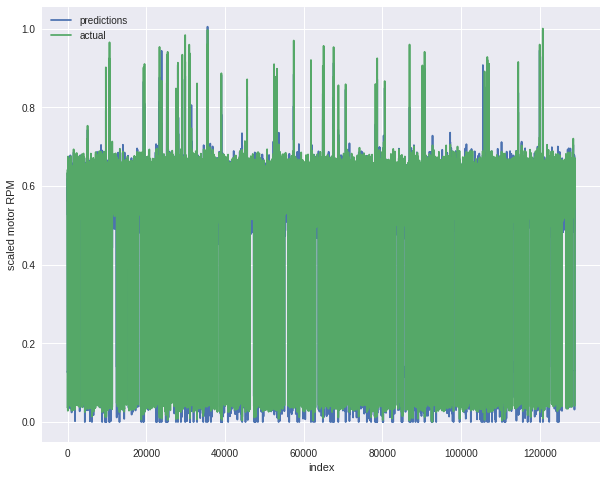

In [0]:
X = []
y = []
lookback = 10  # look 10 samples behind, predict the next hour
for i in range(lookback, len(rms_test_norm)):
    X.append(rms_test_norm.iloc[i-lookback:i].values)
    y.append(rms_test_norm['rpm'].iloc[i])
    
X, y = np.array(X), np.array(y)
    
X = np.reshape(X, (X.shape[0], X.shape[1], len(rms_test_norm.columns)))
predictions = model.predict(X)

plt.figure(figsize=(10,8))
plt.plot(predictions)
plt.plot(y)
plt.ylabel('scaled motor RPM')
plt.xlabel('index')
plt.legend(['predictions', 'actual'])
plt.show()

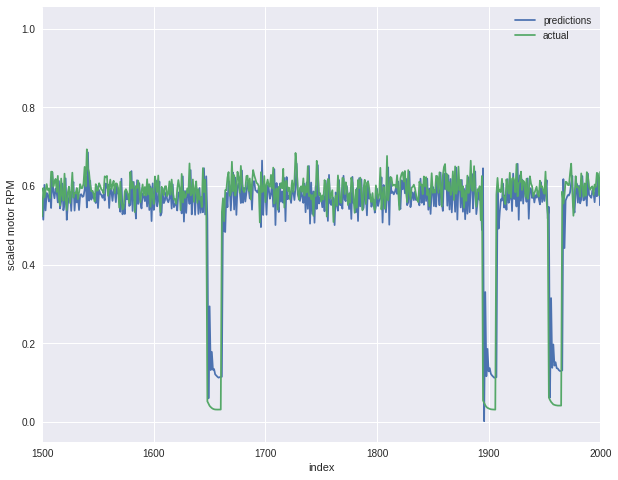

In [0]:
plt.figure(figsize=(10,8))
plt.plot(predictions)
plt.plot(y)
plt.ylabel('scaled motor RPM')
plt.xlabel('index')
plt.legend(['predictions', 'actual'])
plt.xlim((1500, 2000))
plt.show()

The above 2 graphs represent that the predicted rpm values is similar to the rpm values in the testing dataset of all units. From these graphs, we can indicate failure of a unit when the corresponding rpm values shows a sudden drop towards 0 for any unit.

But the major drawback of this model is I can provide about 1 hour of advanced notice. It would have been better if I could implement multi-step RNN to provide a better prediction early on.

# 2nd Approach




Window Sampling and using k-means

A more detailed description of using k means clustering for anomaly detection of time-series data is given here: http://amid.fish/anomaly-detection-with-k-means-clustering.




---



At a very high level, the algorithm will be:

Training:


*   Split waveform data into segments of n samples
*   Form a space in n dimensions, with each segment representing one point
*  Determine clustering of segment points, and determine the centres or centroids of the clusters
*  Cluster centroids provide library of "normal" waveform shapes



Testing:

Try to reconstruct waveform data to be tested using cluster centroids learned during training


In [0]:
def sliding_chunker(data, window_len, slide_len):
    """
    Split a list into a series of sub-lists, each sub-list window_len long,
    sliding along by slide_len each time. If the list doesn't have enough
    elements for the final sub-list to be window_len long, the remaining data
    will be dropped.
    e.g. sliding_chunker(range(6), window_len=3, slide_len=2)
    gives [ [0, 1, 2], [2, 3, 4] ]
    """
    chunks = []
    for pos in range(0, int(len(data)), int(slide_len)):
        chunk = np.copy(data[pos:pos+window_len])
        if len(chunk) != window_len:
            continue
        chunks.append(chunk)

    return chunks

def plot_waves(waves, step):
    """
    Plot a set of 9 waves from the given set, starting from the first one
    and increasing in index by 'step' for each subsequent graph
    """
    plt.figure()
    n_graph_rows = 3
    n_graph_cols = 3
    graph_n = 1
    wave_n = 0
    for _ in range(n_graph_rows):
        for _ in range(n_graph_cols):
            axes = plt.subplot(n_graph_rows, n_graph_cols, graph_n)
            axes.set_ylim([-100, 150])
            plt.plot(waves[wave_n])
            graph_n += 1
            wave_n += step
    # fix subplot sizes so that everything fits
    plt.tight_layout()
    plt.show()

def reconstruct(data, window, clusterer):
    """
    Reconstruct the given data using the cluster centers from the given
    clusterer.
    """
    window_len = int(len(window))
    slide_len = window_len/2
    segments = sliding_chunker(data, window_len, slide_len)
    reconstructed_data = np.zeros(len(data))
    for segment_n, segment in enumerate(segments):
        # window the segment so that we can find it in our clusters which were
        # formed from windowed data
        segment *= window
        nearest_match_idx = clusterer.predict(segment)[0]
        nearest_match = np.copy(clusterer.cluster_centers_[nearest_match_idx])

        pos = segment_n * slide_len
        reconstructed_data[pos:pos+window_len] += nearest_match

    return reconstructed_data


The first step is to split the waveform into overlapping segments, with the section of the original data sampled sliding along by two samples each time. We take this approach so that we get instances of each waveform shape with a variety of horizontal translations.

In this implementation 16 data points are chosen

In [18]:
df_ts = pd.DataFrame(rms_norm.loc["2005-08-02":"2005-08-15"]['rpm'])
segment_len = 16
slide_len = 1
y = df_ts.rpm
segments = []
for start_pos in range(0, len(y), slide_len):
    end_pos = start_pos + segment_len
    segment = np.copy(y[start_pos:end_pos])
    if len(segment) != segment_len:
        continue
    segments.append(segment)
print("Produced %d waveform segments" % len(segments))

Produced 321 waveform segments


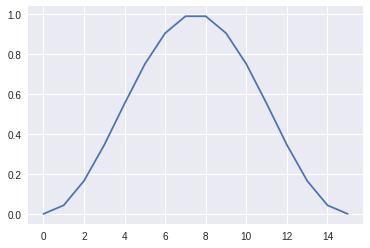

In [19]:
window_rads = np.linspace(0, np.pi, segment_len)
window = np.sin(window_rads)**2
plt.plot(window)
plt.show()

In [0]:
windowed_segments = []
for segment in segments:
    windowed_segment = np.copy(segment) * window
    windowed_segments.append(windowed_segment)

Next, the waveform segments are clustered in n-dimensional space where n is the number of different segment shapes the algorithm learned.

In [21]:
clusterer = KMeans(n_clusters=len(segments))
clusterer.fit(windowed_segments)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=321, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**Reconstruction from Clusters:**

* Split the data into overlapping segments
* Find the cluster centroid which best matches our segment
* Use that centroid as the reconstruction for that segment
* Join the reconstruction segments up to form the reconstruction

This time, we only need enough overlap between segments to allow us to stitch the reconstructions back together again, so we'll go with an overlap of half a segment.



In [0]:
slide_len = segment_len/2
slide_len= int(slide_len)

test_segments = sliding_chunker(y,window_len=segment_len,slide_len=slide_len)

In [0]:
reconstruction = np.zeros(len(y))
slide_len = segment_len/2

for segment_n, segment in enumerate(test_segments):
    segment = np.copy(segment)
    segment *= window
    segment = segment.reshape(1,-1)
    nearest_centroid_idx = clusterer.predict(segment)[0]
    centroids = clusterer.cluster_centers_
    nearest_centroid = np.copy(centroids[nearest_centroid_idx])
    
    # overlay our reconstructed segments with an overlap of half a segment
    pos = int(segment_n * slide_len)
    reconstruction[pos:pos+segment_len] += nearest_centroid

Text(0.5, 1.0, 'Reconstructed behavior of RPM of unit 0')

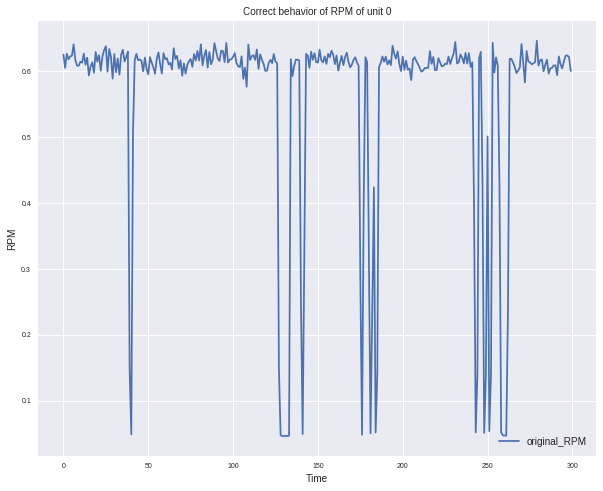

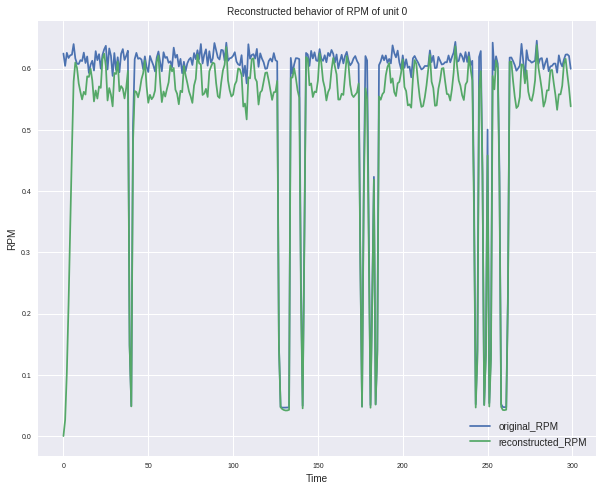

In [24]:
n_plot_samples = 300
# error = reconstruction[0:n_plot_samples] - y[0:n_plot_samples]
# error_98th_percentile = np.percentile(error, 98)
x_index = np.linspace(0,len(reconstruction)-1,len(reconstruction))
x_index = x_index.astype(int)
plotting_df = pd.DataFrame({'x':x_index[0:n_plot_samples], 'original_RPM': y.values[0:n_plot_samples]})
plotting_df.drop(['x'],axis=1,inplace=True)

ts_plot = plotting_df.plot(figsize=(10,8))
ts_plot.legend(loc=4, prop={'size': 10})
plt.xlabel('Time', fontsize=10)
plt.ylabel('RPM', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title('Correct behavior of RPM of unit 0',fontsize = 10)


plotting_df = pd.DataFrame({'x':x_index[0:n_plot_samples], 'original_RPM': y.values[0:n_plot_samples],'reconstructed_RPM':reconstruction[0:n_plot_samples]})#, 'error':error})
plotting_df.drop(['x'],axis=1,inplace=True)
ts_plot = plotting_df.plot(figsize=(10,8))
ts_plot.legend(loc=4, prop={'size': 10})
plt.xlabel('Time', fontsize=10)
plt.ylabel('RPM', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title('Reconstructed behavior of RPM of unit 0',fontsize = 10)

In the above method, again we can observe that the reconstructed rpm matches that of original rpm and can be used to predict the rpm values of the testing dataset as implemented in the first method. Due to time constraint, I am not able to show the same.


# Summary
* **Does it show meaningful clustering? Do the observations appear independent?**
As discussed before, from the plots generated the data can be separated into 2 meaningful clusters. The data are not independent as we saw in the correlation graph between rpm, voltage and current.

* **How accurately can we forecast future observations, and how long a window do we need to make an accurate forecast? **
As seen from both implementations, in RNN implementation a window size of 10 hour was used and in k-means a window of 3 hour was used to generate the rpm curve. While both these algorithms were used to reconstruct the original curve, it did not explicitly generate a forecast, as it used the historical data for the RPM to come up with an estimate of the data for the RPM. While it did not generate an explicit forecast, this method could still be used for failure detection as explained previously.

**Why these algorithms?**
* Easy to implement
* Fast Results

**Shortcomings of these algorithms?**
* Not exactly a accurate predictive model.

I decided to use these  odels to predict unit failures within given a time window. Even though these methods can't provide very accurate lifetime predictions for units far in the future, they can let us know if the units will fail in a short time period so as to help ExampleCo with their maintenance


**If I had more time**

* I would have loved to implement ARIMA and Hidden Markov Models taking into account the seasonal variations.

* Done more exploratory analysis on the alarm data and incorporated information on warning and error times in my predictive model

* Implemented other clustering algorithms like Random Forest and XGboosting and compare the results.


**Thank you so much for the opportunity of solving this interesting problem and taking time to review my solution. Looking for a positive feedback**



---

SHASHANK KAMATH KALASA MOHANDAS


shashankkamathkm@gmai.com